# Problem Statement

### Grades of Students dataset
#### Problem Statement:
The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades

Columns Description    --  total 43 columns
-Seat No : The enrolled number of candidate that took the exams

-

CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.

 

·       All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam



 

Predict   CGPA of a student based on different grades in four years.

Downlaod Files:
https://github.com/dsrscientist/dataset4
https://github.com/dsrscientist/dataset4/blob/main/Grades.csv

## Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, max_error, mean_squared_error
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis

In [2]:
# loading the data
data=pd.read_csv('Grades.csv')
data.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [3]:
data.shape

(571, 43)

In [4]:
data.dtypes

Seat No.      object
PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object

#### ALl data is of object datatype except CGPA column which is of float datatype.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

### As we can see there are lot of null vallues.

In [6]:
## Checking for duplicates
data.duplicated().sum()

0

##### We dont have any duplicates.

In [7]:
# Checking for null values
data.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

## Data Cleaning

In [8]:
# droping Seat no. column as it has no relevance in prediction
data=data.drop('Seat No.', axis=1)
data.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [9]:
# Checking for duplicate values
for i in data:
    print(i,'\n', data[i].unique(), '\n')

PH-121 
 ['B-' 'A' 'D' 'A-' 'B+' 'B' 'C+' 'C' 'C-' 'D+' 'WU' 'A+' 'F'] 

HS-101 
 ['D+' 'D' 'B' 'C+' 'A-' 'B-' 'C-' 'B+' 'C' 'A' 'A+' 'F'] 

CY-105 
 ['C-' 'D+' 'A' 'A-' 'B' 'C+' 'B+' 'B-' 'C' 'D' nan 'WU' 'A+' 'F'] 

HS-105/12 
 ['C' 'D' 'B-' 'B+' 'D+' 'B' 'C-' 'C+' 'A-' 'A' nan 'WU' 'A+' 'F'] 

MT-111 
 ['C-' 'B-' 'B+' 'D' 'A' 'C+' 'A-' 'C' 'B' 'D+' nan 'A+' 'F' 'WU'] 

CS-105 
 ['D+' 'C' 'A' 'A-' 'B' 'B-' 'B+' 'C+' 'C-' 'A+' 'D'] 

CS-106 
 ['D' 'B-' 'D+' 'A-' 'C+' 'A' 'C-' 'C' 'B' 'B+' nan 'A+' 'F' 'WU'] 

EL-102 
 ['C-' 'A' 'B+' 'B' 'A-' 'B-' 'C' 'C+' 'D+' 'D' nan 'A+' 'WU' 'F'] 

EE-119 
 ['B-' 'D+' 'A-' 'D' 'A' 'B+' 'B' 'C-' 'C+' 'C' 'WU' nan 'A+'] 

ME-107 
 ['C-' 'D' 'A-' 'C+' 'B+' 'A' 'D+' 'C' 'B' 'B-' 'WU' nan 'F' 'A+'] 

CS-107 
 ['C-' 'B+' 'B-' 'D' 'C' 'A-' 'C+' 'D+' 'B' 'A' nan 'A+' 'I' 'WU' 'F'] 

HS-205/20 
 ['B+' 'C+' 'A-' 'B' 'A' 'B-' nan 'D' 'WU' 'A+' 'C' 'D+' 'C-' 'F'] 

MT-222 
 ['D' 'B-' 'A' 'D+' 'C' 'B+' 'A-' 'B' 'C+' nan 'C-' 'WU' 'F' 'A+' 'W'] 

EE-222 
 ['A-' 

## Replacing null values

In [10]:
#replacing missing values in age column with mean value
for i in data:
    if i !='CGPA':
        data[i].fillna(data[i].mode()[0],inplace=True)

In [11]:
data.isnull().sum()

PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

## Replace white space if any

In [12]:
data.replace([' ','  '], ['',''], inplace=True)

In [13]:
data

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,B,A,A,A-,A+,A,A-,A-,A+,B+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,A+,A,A,A,A,A,A,A-,A,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,B,A,A-,B+,A,A,A,A,A,B,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,A,B+,D,A,D,D+,B-,C-,B-,C-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [14]:
# Checking null value if any whitespaces has been replaced with null
data.isnull().sum()

PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

### There were no whitespaces in our data

In [15]:
data.describe()

,CGPA
count,571.000000
mean,2.954888
std,0.620552
min,0.800000
25%,2.538000
50%,3.029000
75%,3.451000
max,3.985000


In [16]:
# Value student score for all subject
for i in data.drop('CGPA', axis=1):Gaussian Regression
    print('Course Name',i,'\n',data[i].value_counts())

Course Name PH-121 
 A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
F       1
Name: PH-121, dtype: int64
Course Name HS-101 
 A-    82
B-    78
C     68
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
F      1
Name: HS-101, dtype: int64
Course Name CY-105 
 A     178
A-    120
B+     50
B      49
B-     42
D      31
A+     31
C      19
C+     17
C-     16
D+     14
WU      3
F       1
Name: CY-105, dtype: int64
Course Name HS-105/12 
 A     97
A-    75
B+    70
B     57
D     45
C     41
B-    40
C+    39
C-    36
D+    34
A+    34
WU     2
F      1
Name: HS-105/12, dtype: int64
Course Name MT-111 
 A-    107
A     100
B-     70
B+     62
B      55
C-     39
C+     33
C      30
D      26
A+     23
D+     21
WU      3
F       2
Name: MT-111, dtype: int64
Course Name CS-105 
 A     151
A-    134
B+     60
B      51
A+     43
B-     38
C+     23
C      22
C-     22
D+     15
D      12
Name: CS

##### We can observe that for almost all courses majority student received grades'A' and 'A-' and number of failed is very less.


##### Visualising the above data in chart  percentage wise for better understanding. According to above data best plot would be pie plot.

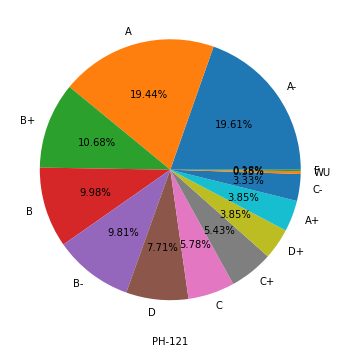

<Figure size 432x288 with 0 Axes>

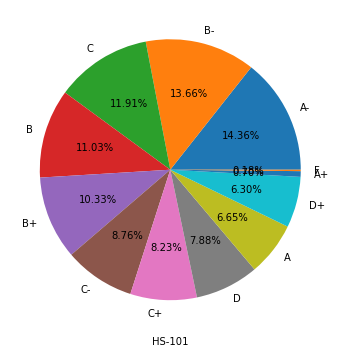

<Figure size 432x288 with 0 Axes>

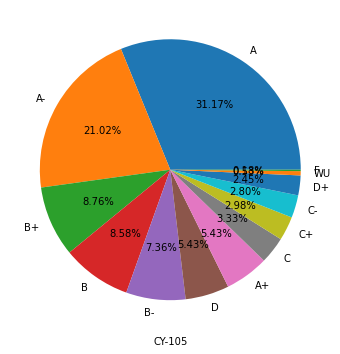

<Figure size 432x288 with 0 Axes>

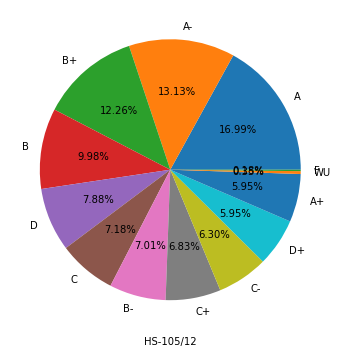

<Figure size 432x288 with 0 Axes>

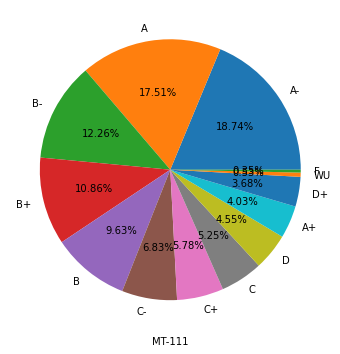

<Figure size 432x288 with 0 Axes>

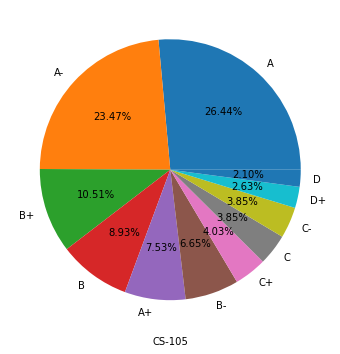

<Figure size 432x288 with 0 Axes>

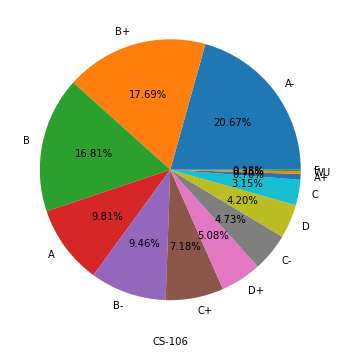

<Figure size 432x288 with 0 Axes>

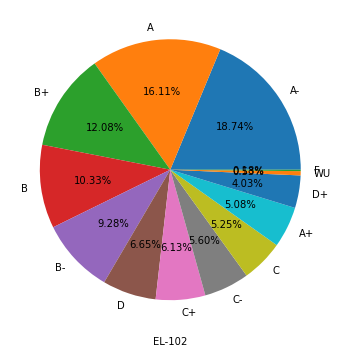

<Figure size 432x288 with 0 Axes>

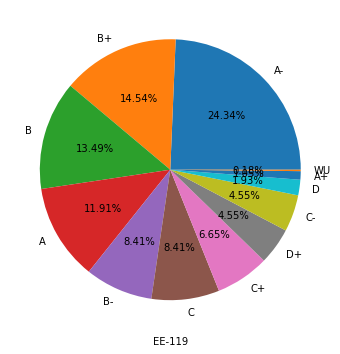

<Figure size 432x288 with 0 Axes>

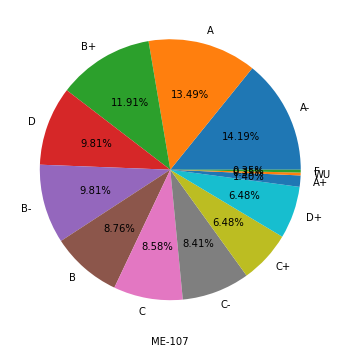

<Figure size 432x288 with 0 Axes>

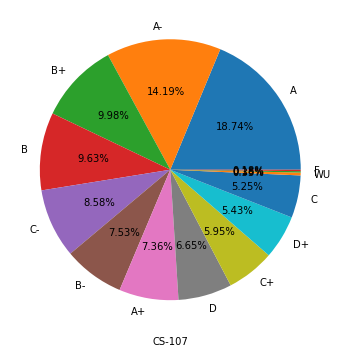

<Figure size 432x288 with 0 Axes>

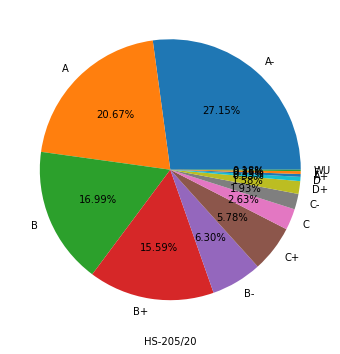

<Figure size 432x288 with 0 Axes>

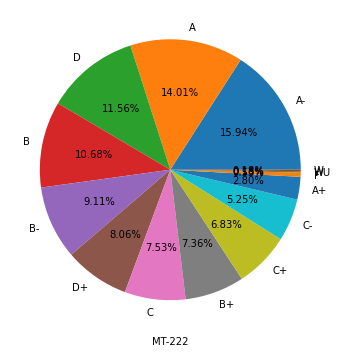

<Figure size 432x288 with 0 Axes>

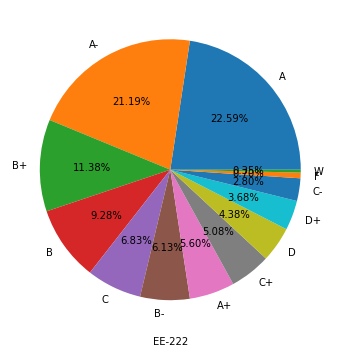

<Figure size 432x288 with 0 Axes>

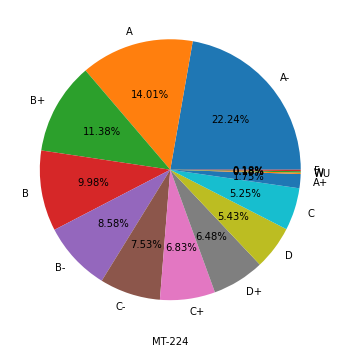

<Figure size 432x288 with 0 Axes>

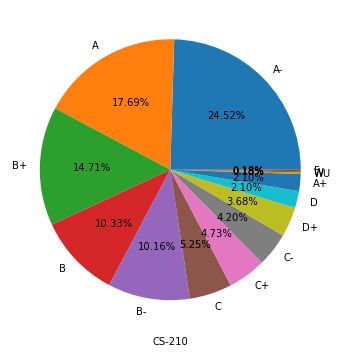

<Figure size 432x288 with 0 Axes>

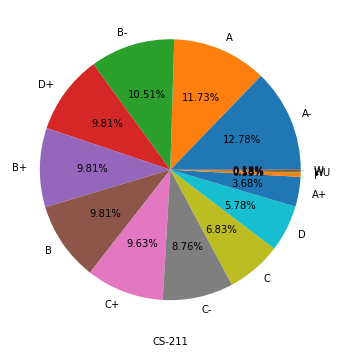

<Figure size 432x288 with 0 Axes>

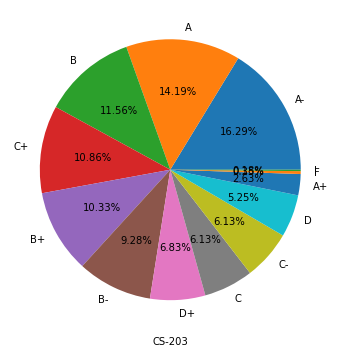

<Figure size 432x288 with 0 Axes>

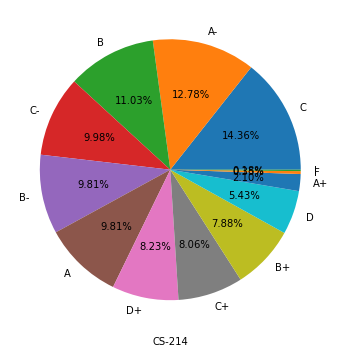

<Figure size 432x288 with 0 Axes>

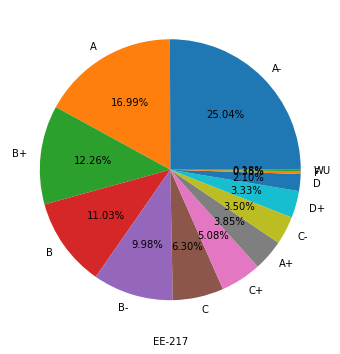

<Figure size 432x288 with 0 Axes>

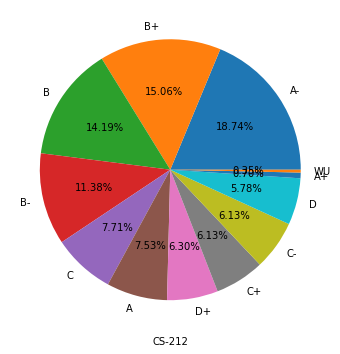

<Figure size 432x288 with 0 Axes>

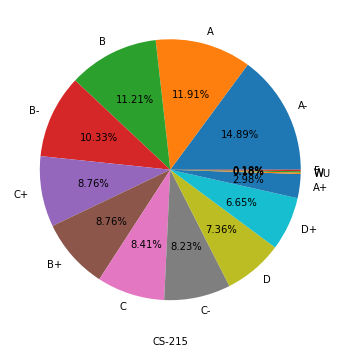

<Figure size 432x288 with 0 Axes>

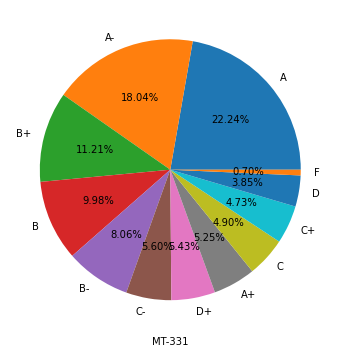

<Figure size 432x288 with 0 Axes>

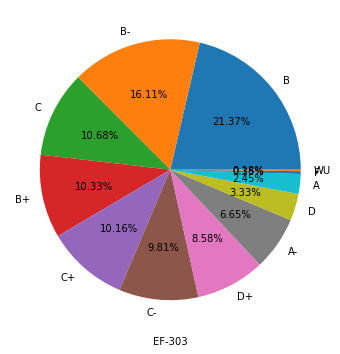

<Figure size 432x288 with 0 Axes>

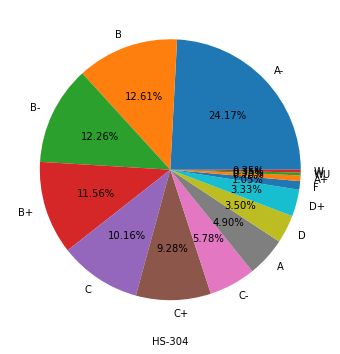

<Figure size 432x288 with 0 Axes>

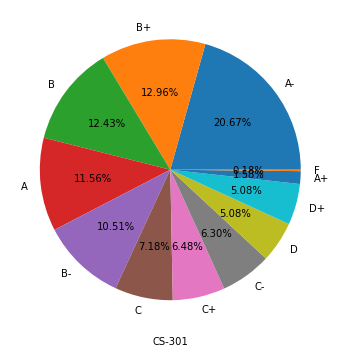

<Figure size 432x288 with 0 Axes>

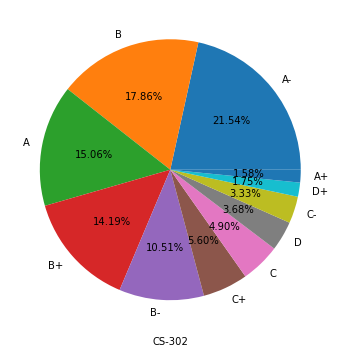

<Figure size 432x288 with 0 Axes>

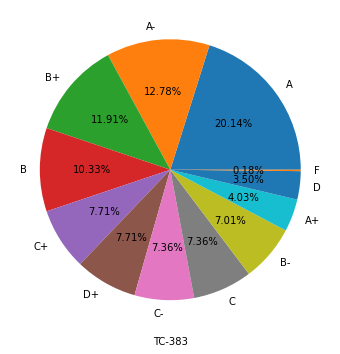

<Figure size 432x288 with 0 Axes>

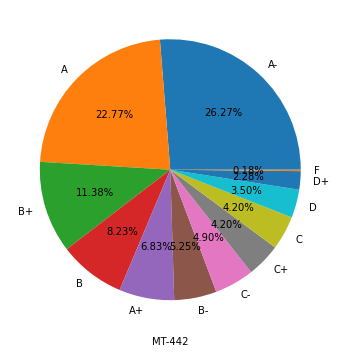

<Figure size 432x288 with 0 Axes>

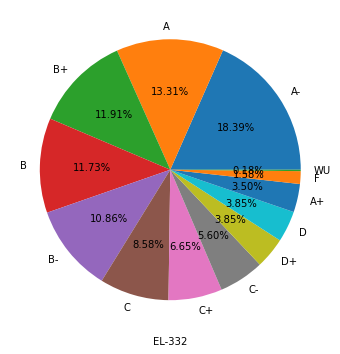

<Figure size 432x288 with 0 Axes>

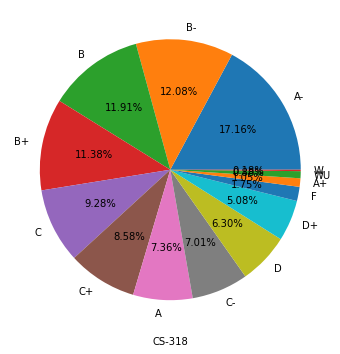

<Figure size 432x288 with 0 Axes>

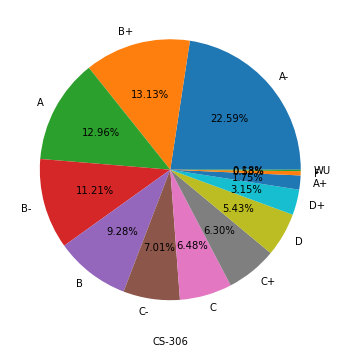

<Figure size 432x288 with 0 Axes>

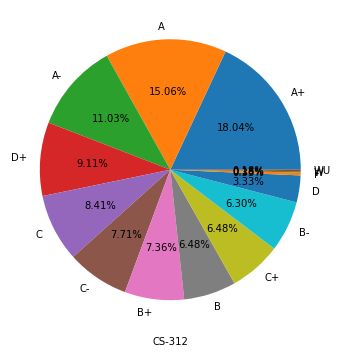

<Figure size 432x288 with 0 Axes>

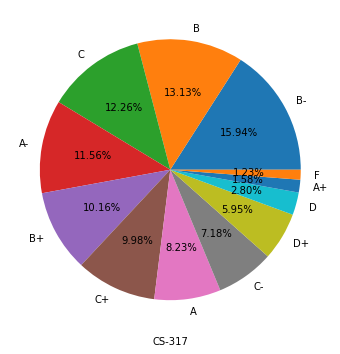

<Figure size 432x288 with 0 Axes>

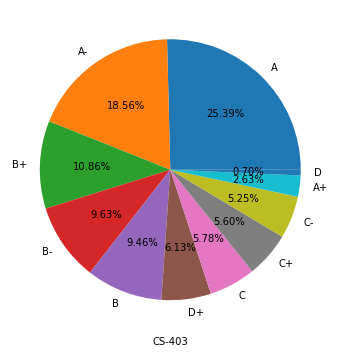

<Figure size 432x288 with 0 Axes>

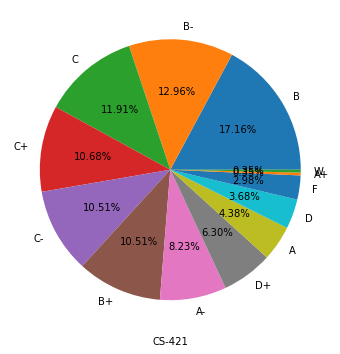

<Figure size 432x288 with 0 Axes>

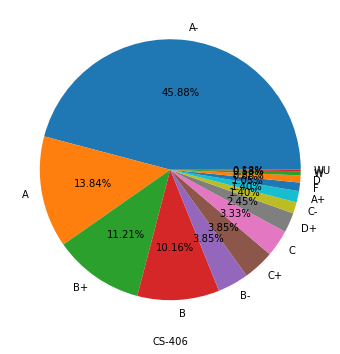

<Figure size 432x288 with 0 Axes>

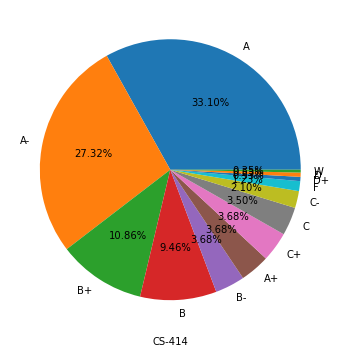

<Figure size 432x288 with 0 Axes>

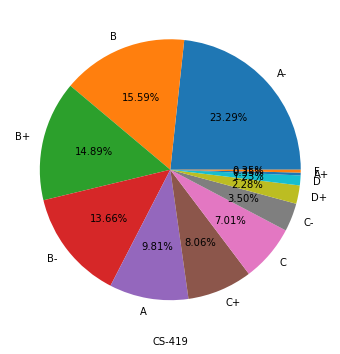

<Figure size 432x288 with 0 Axes>

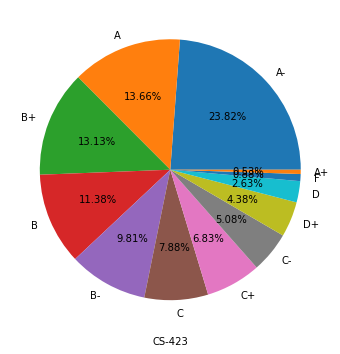

<Figure size 432x288 with 0 Axes>

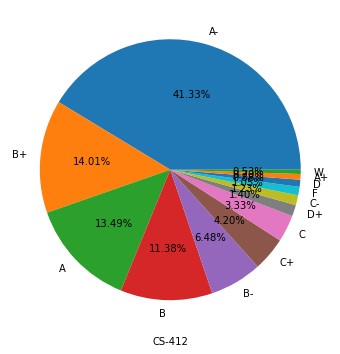

<Figure size 432x288 with 0 Axes>

In [17]:
#Ploting pie chart for evry subject
for i in data:
    if i !='CGPA':
        plt.figure(figsize=(6,6))
        data[i].value_counts().plot.pie(autopct='%.2f%%')
        plt.xlabel(i)
        plt.ylabel('')
        plt.figure()

##### We can observe that
###### PH-121-Majority students in this subject has scored a grade of A- followed by A 
######  HS-101- Majority students in this subject has scored a grade of A- followed by 'B-'   
###### CY-105- Majority students in this subject has scored a grade of A followed by 'A-'
###### HS-105/12- Majority students in this subject has scored a grade of A.
###### MT-111 -Majority students in this subject has scored a grade of A- followed by A 
###### CS-105- Majority students in this subject has scored a grade of A followed by 'A+-
######  CS-106- Majority students in this subject has scored a grade of A- followed by B+ 

##### similariry we can look at all 41 charts.
       

# Encoding

#### Devide data into feature(x) and target(y)

In [18]:
x=data.drop('CGPA', axis=1)
y=data['CGPA']

In [19]:
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
ordinal=OrdinalEncoder()

# using ordinal encoder for feature columns
for i in x:
    x[i]=ordinal.fit_transform(x[i].values.reshape(-1,1))
    
x.head()    

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,5.0,10.0,8.0,6.0,8.0,10.0,9.0,8.0,5.0,8.0,...,6.0,8.0,8.0,8.0,8.0,2.0,0.0,8.0,3.0,2.0
1,0.0,9.0,10.0,9.0,5.0,6.0,9.0,0.0,10.0,9.0,...,9.0,10.0,9.0,6.0,9.0,2.0,5.0,6.0,6.0,3.0
2,0.0,3.0,0.0,5.0,4.0,0.0,5.0,4.0,2.0,2.0,...,2.0,3.0,3.0,0.0,6.0,0.0,0.0,0.0,2.0,0.0
3,9.0,7.0,10.0,9.0,9.0,2.0,10.0,8.0,9.0,7.0,...,8.0,10.0,6.0,10.0,8.0,5.0,3.0,7.0,7.0,7.0
4,2.0,2.0,2.0,4.0,0.0,0.0,2.0,4.0,0.0,2.0,...,2.0,5.0,4.0,4.0,5.0,2.0,0.0,2.0,2.0,0.0


In [20]:
x['CS-318'].unique()

array([ 8.,  2.,  4.,  5.,  6.,  3.,  7.,  9., 10.,  0.,  1., 13., 11.,
       12.])

In [21]:
data['CS-318'].unique()

array(['C-', 'A-', 'B+', 'B-', 'C', 'B', 'C+', 'D', 'D+', 'A', 'A+', 'WU',
       'F', 'W'], dtype=object)

# Outlier

### Since our feature data is categorical. So we dont need to check for outliers.

# Skewness

### Since our feature data is categorical. So we dont need to check for skewness as well.

# Checking multicolinearity1

In [22]:
x.corr()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
PH-121,1.000000,0.382436,0.557843,0.498561,0.468968,0.609990,0.293963,0.423942,0.579964,0.533558,...,0.472384,0.038184,0.464022,0.321264,0.290351,0.280166,0.152437,0.462770,0.094921,0.293815
HS-101,0.382436,1.000000,0.335074,0.473132,0.432742,0.400713,0.312019,0.349412,0.309697,0.336545,...,0.432533,0.213380,0.364250,0.229546,0.301934,0.265551,0.225977,0.284668,0.228103,0.226039
CY-105,0.557843,0.335074,1.000000,0.510123,0.538380,0.578573,0.378223,0.447539,0.467250,0.464418,...,0.362537,0.261555,0.472137,0.464575,0.349827,0.129957,0.008774,0.430053,0.120885,0.064912
HS-105/12,0.498561,0.473132,0.510123,1.000000,0.494731,0.482406,0.499093,0.360304,0.400303,0.320137,...,0.484828,0.263143,0.478816,0.451907,0.415946,0.168150,0.142806,0.465352,0.235029,0.153293
MT-111,0.468968,0.432742,0.538380,0.494731,1.000000,0.393684,0.500729,0.555895,0.409161,0.471685,...,0.474400,0.467946,0.555098,0.410540,0.511463,0.300391,0.228637,0.502473,0.400679,0.269792
CS-105,0.609990,0.400713,0.578573,0.482406,0.393684,1.000000,0.286324,0.353949,0.507357,0.455470,...,0.418766,0.059711,0.387639,0.279329,0.236345,0.237615,0.121965,0.306827,0.045134,0.179777
CS-106,0.293963,0.312019,0.378223,0.499093,0.500729,0.286324,1.000000,0.338645,0.269895,0.281233,...,0.338987,0.450752,0.416562,0.426402,0.397195,0.129554,0.108916,0.421989,0.339963,0.185782
EL-102,0.423942,0.349412,0.447539,0.360304,0.555895,0.353949,0.338645,1.000000,0.448908,0.461690,...,0.411977,0.301324,0.466556,0.304240,0.368959,0.253133,0.242234,0.379308,0.369173,0.265289
EE-119,0.579964,0.309697,0.467250,0.400303,0.409161,0.507357,0.269895,0.448908,1.000000,0.572964,...,0.419649,0.156809,0.445496,0.341988,0.359230,0.297664,0.214165,0.465913,0.244615,0.320746
ME-107,0.533558,0.336545,0.464418,0.320137,0.471685,0.455470,0.281233,0.461690,0.572964,1.000000,...,0.401833,0.199848,0.462568,0.336647,0.345832,0.300913,0.154184,0.440407,0.220977,0.293638


<AxesSubplot:>

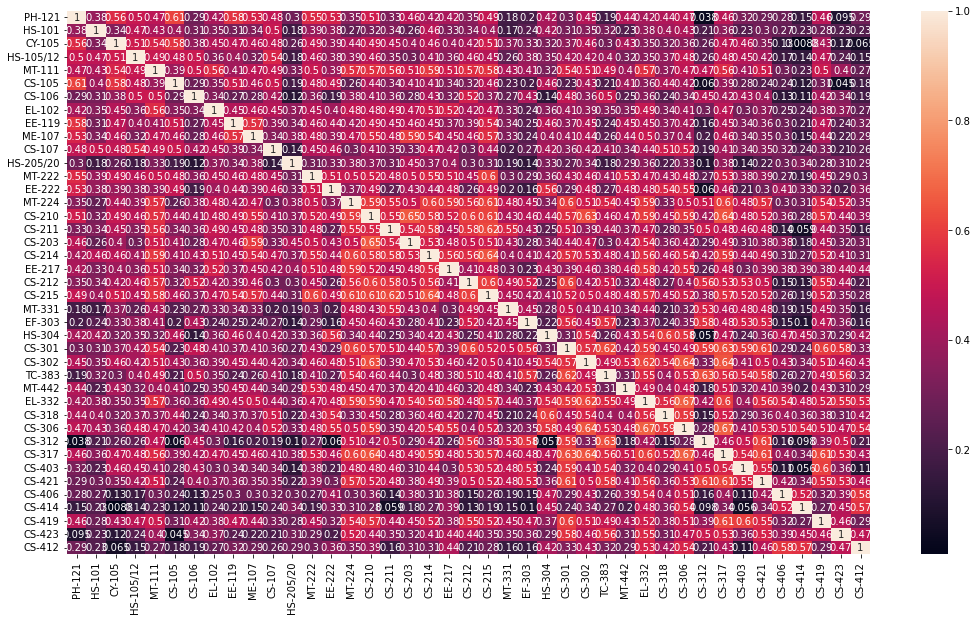

In [23]:
plt.figure(figsize=(18,10))
sns.heatmap(x.corr(), annot=True)

### There is no multicolinearity in our data

# Scaling

In [24]:
x

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,5.0,10.0,8.0,6.0,8.0,10.0,9.0,8.0,5.0,8.0,...,6.0,8.0,8.0,8.0,8.0,2.0,0.0,8.0,3.0,2.0
1,0.0,9.0,10.0,9.0,5.0,6.0,9.0,0.0,10.0,9.0,...,9.0,10.0,9.0,6.0,9.0,2.0,5.0,6.0,6.0,3.0
2,0.0,3.0,0.0,5.0,4.0,0.0,5.0,4.0,2.0,2.0,...,2.0,3.0,3.0,0.0,6.0,0.0,0.0,0.0,2.0,0.0
3,9.0,7.0,10.0,9.0,9.0,2.0,10.0,8.0,9.0,7.0,...,8.0,10.0,6.0,10.0,8.0,5.0,3.0,7.0,7.0,7.0
4,2.0,2.0,2.0,4.0,0.0,0.0,2.0,4.0,0.0,2.0,...,2.0,5.0,4.0,4.0,5.0,2.0,0.0,2.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3.0,0.0,0.0,2.0,1.0,0.0,2.0,2.0,1.0,4.0,...,4.0,2.0,2.0,0.0,0.0,0.0,4.0,4.0,3.0,0.0
567,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,2.0,4.0,4.0,0.0,0.0,2.0,3.0,2.0,6.0,2.0
568,3.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,...,4.0,2.0,3.0,0.0,4.0,0.0,6.0,4.0,2.0,2.0
569,0.0,4.0,9.0,0.0,9.0,10.0,5.0,8.0,5.0,8.0,...,4.0,9.0,3.0,3.0,8.0,9.0,6.0,3.0,5.0,6.0


In [25]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler=MinMaxScaler()

xd=scaler.fit_transform(x)
x=pd.DataFrame(xd,columns=x.columns)

In [26]:
x

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,0.416667,0.909091,0.666667,0.500000,0.666667,1.0,0.750000,0.666667,0.454545,0.666667,...,0.500000,0.615385,0.727273,0.8,0.666667,0.153846,0.000000,0.727273,0.272727,0.166667
1,0.000000,0.818182,0.833333,0.750000,0.416667,0.6,0.750000,0.000000,0.909091,0.750000,...,0.750000,0.769231,0.818182,0.6,0.750000,0.153846,0.416667,0.545455,0.545455,0.250000
2,0.000000,0.272727,0.000000,0.416667,0.333333,0.0,0.416667,0.333333,0.181818,0.166667,...,0.166667,0.230769,0.272727,0.0,0.500000,0.000000,0.000000,0.000000,0.181818,0.000000
3,0.750000,0.636364,0.833333,0.750000,0.750000,0.2,0.833333,0.666667,0.818182,0.583333,...,0.666667,0.769231,0.545455,1.0,0.666667,0.384615,0.250000,0.636364,0.636364,0.583333
4,0.166667,0.181818,0.166667,0.333333,0.000000,0.0,0.166667,0.333333,0.000000,0.166667,...,0.166667,0.384615,0.363636,0.4,0.416667,0.153846,0.000000,0.181818,0.181818,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,0.250000,0.000000,0.000000,0.166667,0.083333,0.0,0.166667,0.166667,0.090909,0.333333,...,0.333333,0.153846,0.181818,0.0,0.000000,0.000000,0.333333,0.363636,0.272727,0.000000
567,0.083333,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.166667,0.000000,0.000000,...,0.166667,0.307692,0.363636,0.0,0.000000,0.153846,0.250000,0.181818,0.545455,0.166667
568,0.250000,0.000000,0.166667,0.333333,0.000000,0.0,0.000000,0.000000,0.000000,0.250000,...,0.333333,0.153846,0.272727,0.0,0.333333,0.000000,0.500000,0.363636,0.181818,0.166667
569,0.000000,0.363636,0.750000,0.000000,0.750000,1.0,0.416667,0.666667,0.454545,0.666667,...,0.333333,0.692308,0.272727,0.3,0.666667,0.692308,0.500000,0.272727,0.454545,0.500000


# ML modeling

### LinearRegression

In [27]:
lnr=LinearRegression()
for i in range(1,100):
    x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3, random_state=i)
    lnr.fit(x_train,y_train)
    pred_train=lnr.predict(x_train)
    pred_test=lnr.predict(x_test)
    if r2_score(y_train,pred_train)*100>92 and r2_score(y_test,pred_test)*100>92:
        print('At random state',i,'the train accuracy is', r2_score(y_train,pred_train))
        print('At random state',i,'the test accuracy is', r2_score(y_test,pred_test))
        print('\n')
    

At random state 1 the train accuracy is 0.9224580213678476
At random state 1 the test accuracy is 0.9409279413099761


At random state 2 the train accuracy is 0.9223196607525922
At random state 2 the test accuracy is 0.9392861905105498


At random state 3 the train accuracy is 0.9272677762813477
At random state 3 the test accuracy is 0.9260129302017079


At random state 4 the train accuracy is 0.9265676974728839
At random state 4 the test accuracy is 0.9208839904860822


At random state 12 the train accuracy is 0.9304874742462408
At random state 12 the test accuracy is 0.9238688828847903


At random state 23 the train accuracy is 0.9247751939208588
At random state 23 the test accuracy is 0.9342983186712068


At random state 25 the train accuracy is 0.92644653256348
At random state 25 the test accuracy is 0.9290092390191719


At random state 26 the train accuracy is 0.9223171887173598
At random state 26 the test accuracy is 0.9404073907299302


At random state 27 the train accuracy is 0

#### At random state 69 we are receiving our best accuarcy for both test and train set.

In [50]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3, random_state=69)
lnr.fit(x_train,y_train)

pred_test_lnr=lnr.predict(x_test)

print('r2 score', r2_score(y_test,pred_test_lnr))
print('\n max error', max_error(y_test,pred_test_lnr))
print('\n Root mean squared error', mean_squared_error(y_test,pred_test_lnr, squared=False))

r2 score 0.9280098460502498

 max error 1.5349590563930227

 Root mean squared error 0.17127976242079218


In [36]:
for j in range(2,15):
    cv_score=cross_val_score(lnr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print('At cv=',j, 'cross vallue score is', cv_mean)
    print('Differnce between in r2_score and cross value score', r2_score(y_test,pred_test_lnr)-cv_mean)

At cv= 2 cross vallue score is 0.8231612776236574
Differnce between in r2_score and cross value score 0.1048485684265924
At cv= 3 cross vallue score is 0.8860513930214141
Differnce between in r2_score and cross value score 0.04195845302883572
At cv= 4 cross vallue score is 0.8461929786927858
Differnce between in r2_score and cross value score 0.08181686735746407
At cv= 5 cross vallue score is 0.9034513625626616
Differnce between in r2_score and cross value score 0.024558483487588267
At cv= 6 cross vallue score is 0.9038495956275058
Differnce between in r2_score and cross value score 0.024160250422744056
At cv= 7 cross vallue score is 0.901793106938204
Differnce between in r2_score and cross value score 0.026216739112045806
At cv= 8 cross vallue score is 0.9030023319614954
Differnce between in r2_score and cross value score 0.025007514088754457
At cv= 9 cross vallue score is 0.9066157454428857
Differnce between in r2_score and cross value score 0.02139410060736413
At cv= 10 cross vallue

#### At j=13 we are getting best cross value score(Differnce between in r2_score and cross value score is minimum)

In [37]:
# cross validation for lnr model
cv_score=cross_val_score(lnr,x,y,cv=13)
cv_mean=cv_score.mean()
print('At cv=',j, 'cross vallue score is', cv_mean)
print('Differnce between in r2_score and cross value score', r2_score(y_test,pred_test_lnr)-cv_mean)

At cv= 14 cross vallue score is 0.9113203586204718
Differnce between in r2_score and cross value score 0.01668948742977805


### DecisionTreeRegressor

In [38]:
from sklearn.tree import DecisionTreeRegressor

dtr=DecisionTreeRegressor()
dtr.fit(x_train, y_train)

pred_test_dtr=lnr.predict(x_test)

print('r2 score', r2_score(y_test,pred_test_dtr))
print('\n max error', max_error(y_test,pred_test_dtr))
print('\n Root mean squared error', mean_squared_error(y_test,pred_test_dtr, squared=False))

r2 score 0.9280098460502498

 max error 1.5349590563930227

 Root mean squared error 0.17127976242079218


In [39]:
# cross validation for dtr model
cv_score=cross_val_score(dtr, x,y, cv=13)
cv_mean=cv_score.mean()

print('At cv=',j, 'cross vallue score is', cv_mean)
print('Differnce between in r2_score and cross value score', r2_score(y_test,pred_test_lnr)-cv_mean)

At cv= 14 cross vallue score is 0.8038449742089191
Differnce between in r2_score and cross value score 0.12416487184133074


### SVR

In [43]:
from sklearn.svm import SVR

svr=SVR()
svr.fit(x_train, y_train)

pred_test_svr=svr.predict(x_test)

print('r2 score', r2_score(y_test,pred_test_svr))
print('\n max error', max_error(y_test,pred_test_svr))
print('\n Root mean squared error', mean_squared_error(y_test,pred_test_svr, squared=False))

r2 score 0.9279480599113553

 max error 1.4288567906834533

 Root mean squared error 0.17135324778586408


In [44]:
# cross validation for svr model
cv_score=cross_val_score(svr, x,y, cv=13)
cv_mean=cv_score.mean()

print('At cv=',j, 'cross vallue score is', cv_mean)
print('Differnce between in r2_score and cross value score', r2_score(y_test,pred_test_lnr)-cv_mean)

At cv= 14 cross vallue score is 0.9177447949568402
Differnce between in r2_score and cross value score 0.010265051093409583


### Random Forest Regressor

In [45]:
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)

pred_test_rfr=rfr.predict(x_test)

print('r2 score', r2_score(y_test,pred_test_rfr))
print('\n max error', max_error(y_test,pred_test_rfr))
print('\n Root mean squared error', mean_squared_error(y_test,pred_test_rfr, squared=False))

r2 score 0.9218130145550143

 max error 1.2544600000000015

 Root mean squared error 0.17849938954523964


In [46]:
# cross validation for rfr model
cv_score=cross_val_score(rfr, x,y, cv=13)
cv_mean=cv_score.mean()

print('At cv=',j, 'cross vallue score is', cv_mean)
print('Differnce between in r2_score and cross value score', r2_score(y_test,pred_test_lnr)-cv_mean)

At cv= 14 cross vallue score is 0.9159153749911358
Differnce between in r2_score and cross value score 0.012094471059113987


### Regularisation

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso

### Ridge

In [51]:
rg=Ridge()
rg.fit(x_train,y_train)

pred_test_rg=rg.predict(x_test)

print('r2 score', r2_score(y_test,pred_test_rg))
print('\n max error', max_error(y_test,pred_test_rg))
print('\n Root mean squared error', mean_squared_error(y_test,pred_test_rg, squared=False))

r2 score 0.9299984362386794

 max error 1.555577155468827

 Root mean squared error 0.16889755848809535


In [76]:
# cross validation for rg
cv_score=cross_val_score(rg, x,y, cv=13)
cv_mean=cv_score.mean()

print('At cv=',j, 'cross vallue score is', cv_mean)
print('Differnce between in r2_score and cross value score', r2_score(y_test,pred_test_lnr)-cv_mean)

At cv= 14 cross vallue score is 0.9130896627413888
Differnce between in r2_score and cross value score 0.014920183308861024


In [59]:
parameters={'alpha':[.001,.01,1,10], 'solver':['auto', 'svd', 'saga'],'random_state':list(range(0,10))}

clf=GridSearchCV(Ridge(),parameters)
clf.fit(x_train, y_train)
print(clf.best_params_)

{'alpha': 10, 'random_state': 0, 'solver': 'saga'}


In [73]:
rg_reg=Ridge(alpha=10,random_state=0, solver='saga')
rg_reg.fit(x_train, y_train)

pred_test_rg_reg=rg_reg.predict(x_test)

print('r2 score', r2_score(y_test,pred_test_rg_reg))
print('\n max error', max_error(y_test,pred_test_rg_reg))
print('\n Root mean squared error', mean_squared_error(y_test,pred_test_rg_reg, squared=False))


r2 score 0.9328198483482236

 max error 1.6422699379801327

 Root mean squared error 0.16545884587788218


In [74]:
# cross validation for rg_reg
cv_score=cross_val_score(rg_reg, x,y, cv=13)
cv_mean=cv_score.mean()

print('At cv=',j, 'cross vallue score is', cv_mean)
print('Differnce between in r2_score and cross value score', r2_score(y_test,pred_test_lnr)-cv_mean)

At cv= 14 cross vallue score is 0.9177875274379214
Differnce between in r2_score and cross value score 0.010222318612328474


# Saving Model

In [78]:
import pickle

filename='grades.pkl'
pickle.dump(rg_reg, open(filename,'wb'))

# Conclusion

#### Since rg_reg is providing the best result(minimum difference between accuracy and validation score). So we will save the rg_reg  model.

In [79]:
loaded_model=pickle.load(open('grades.pkl','rb'))


original=np.array(y_test)
predicted=np.array(loaded_model.predict(x_test))

In [81]:
r2_score(y_test,loaded_model.predict(x_test))

0.9328198483482236

In [82]:
df=pd.DataFrame({'Original':original,'Predicted':predicted})
df

,Original,Predicted
0,2.129,2.119811
1,1.906,1.852012
2,3.133,3.106105
3,2.379,2.336748
4,1.949,1.946488
...,...,...
167,3.848,3.809342
168,3.452,3.284913
169,2.579,2.626422
170,3.063,2.818136
